# Multi-Modal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. In addition, there is an optional task to try some different approaches to identify persons from the same dataset. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors and depth camera, user-independently.

## Author(s)
Add your information here

Names: Angelva Noora, Lage Manuel

Student numbers: 2207825, 2204610 

## Description 

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometer (attached to subject's thigh) and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. Original dataset have also another acceleration sensor and pressure-sensitive mat, but those two modalities are ommited in this project. There are totally 30 subjects in the original dataset, and in this work subset of 10 person is utilized. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the subset of dataset in Moodle.

The project work is divided on following phases:

1. Data preparation, exploration, and visualization
2. Feature extraction and unimodal fusion for classification
3. Feature extraction and feature-level fusion for multimodal classification
4. Decision-level fusion for multimodal classification
5. Bonus task: Multimodal biometric identification of persons

where 1-4 are compulsory (max. 10 points each), and 5 is optional to get bonus points (max. 5+5 points). In each phase, you should visualize and analyse the results and document the work and findings properly by text blocks and figures between the code. <b> Nice looking </b> and <b> informative </b> notebook representing your results and analysis will be part of the grading in addition to actual implementation.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as 
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Learning goals 

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material 

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data preparation, exploration, and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 1.</b>

Download data from the Moodle's Project section. Get yourself familiar with the folder structure and data. You can read the data files using the function given below. Each file consists one exercise type performed by single user. Data are divided on multiple folders. Note that, in each folder there is one long sequence of single exercise, except exercise 4 which is performed two times in different ways. Those two sequences belongs to same class. Do the following subtasks to pre-analyse data examples and to prepare the training and testing data for next tasks:
<br>
<br> 
<p> Read raw data from the files. Prepare and divide each data file to shorter sequences using windowing method. Similar to related article "MEx: Multi-modal Exercises Dataset for Human Activity Recognition", use 5 second window and 3 second overlapping between windows, producing several example sequences from one exercise file for classification purposes. Windowing is working so that starting from the beginning of each long exercise sequence, take 5 seconds of data points (from synchronized acceleration data and depth images) based on the time stamps. Next, move the window 2 seconds forward and take another 5 seconds of data. Then continue this until your are at the end of sequence. Each window will consists 500x3 matrix of acceleration data and 5x192 matrix of depth image data.</p>
<br>  
<p> <b>1.1</b> Plot few examples of prepared data for each modalities (accelometer and depth camera). Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. Take the first windowed example from the long exercise sequence. </p>
<br>
<p> <b>1.2</b> Split the prepared dataset to training and testing datasets so that data of persons 1-7 are used for training and data of persons 8-10 are used for testing. In next tasks, training dataset could be further divided on (multiple) validation data folds to tune the models parameters, when needed.<br>
    
<p> Note: Training set should have 1486 windows and testing set should have 598 windows. In training set, acceleration data will have a window without a pair with depth camera data, that window should be dropped as it doesn't have a pair.<p>
    
    
    
    
Document your work, calculate the indicator statistics of training and testing datasets (number of examples, dimensions of each example) and visualize prepared examples.

</div>

In [1]:
# Import relevant libraries here
from pathlib import Path
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Enter data folder location
loc = "./MEx"

In [2]:
def path_to_meta(p):
    meta = dict()
    meta["subject_id"] = p.parent.stem
    meta["exercise_id"] = p.stem.split("_")[-2]
    meta["trial"] = int(p.stem.split("_")[-1])
    meta["sensor_code"] = p.stem.split("_")[0]
    meta["sensor"] = {"act": "acc", "dc": "dc"}[meta["sensor_code"]]
    return meta

# Find, read, and compose the measurements
paths_record = Path(loc).glob("*/*/*.csv")

records = []

for path_record in paths_record:
    df = pd.read_csv(path_record, delimiter=",", header=None)
    meta = path_to_meta(path_record)
    
    if meta["sensor"] == "acc":
        col_names = ["time", "acc_0", "acc_1", "acc_2"]
        df.columns = col_names
    else:
        num_cols = df.shape[1]
        col_names = ["time", ] + [f"dc_{i}" for i in range(num_cols-1)]
        df.columns = col_names

    meta["df"] = df
    
    records.append(meta)

df_records = pd.DataFrame.from_records(records)

print(f"Total records found: {len(df_records)}")
print("Dataframe with all records:")
display(df_records.head())
print("Dataframe with one measurement series:")
display(df_records["df"].iloc[0].head())

Total records found: 160
Dataframe with all records:


,subject_id,exercise_id,trial,sensor_code,sensor,df
0,02,04,2,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...
1,02,06,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...
2,02,02,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...
3,02,03,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...
4,02,05,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...


Dataframe with one measurement series:


,time,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,...,dc_182,dc_183,dc_184,dc_185,dc_186,dc_187,dc_188,dc_189,dc_190,dc_191
0,0.0,0.4942,0.9815,0.9738,0.9668,0.9618,0.9530,0.9499,0.9437,0.9383,...,0.9479,0.9391,0.9360,0.9329,0.9252,0.9198,0.9167,0.9106,0.9015,0.8993
1,1000.0,0.4942,0.9815,0.9738,0.9697,0.9618,0.9530,0.9499,0.9460,0.9376,...,0.9499,0.9391,0.9352,0.9329,0.9252,0.9198,0.9167,0.9113,0.9005,0.8982
2,2000.0,0.4942,0.9815,0.9738,0.9668,0.9618,0.9539,0.9507,0.9429,0.9391,...,0.9470,0.9391,0.9352,0.9329,0.9244,0.9206,0.9167,0.9106,0.9024,0.8982
3,3000.0,0.4942,0.9805,0.9748,0.9688,0.9618,0.9549,0.9514,0.9445,0.9391,...,0.9499,0.9391,0.9352,0.9329,0.9244,0.9229,0.9167,0.9106,0.9024,0.8982
4,4000.0,0.4926,0.9815,0.9738,0.9678,0.9618,0.9568,0.9499,0.9445,0.9383,...,0.9470,0.9391,0.9360,0.9329,0.9244,0.9229,0.9167,0.9106,0.9005,0.8988


In [3]:
# Extract 5-second long windows with 2-second shift (3-second overlap)

records_windowed = []

time_window = 5000.
time_offset = 2000.
    
for row_idx, row_data in df_records.iterrows():
    df_tmp = row_data["df"]
    time_start = np.min(df_tmp["time"].to_numpy())
    time_end = np.max(df_tmp["time"].to_numpy())
    
    for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
        t1 = t0 + time_window
        # Handle boundary conditions - skip the measurements from the end shorter than window size
        if t1 > time_end:
            continue
        
        tmp_data = deepcopy(row_data)
        tmp_data["window_idx"] = window_idx
        tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                (df_tmp["time"] < t1)].copy()
        
        records_windowed.append(tmp_data)
        
df_records_windowed = pd.DataFrame.from_records(records_windowed)

print(f"Total windows extracted: {len(df_records_windowed)}")
print("Dataframe with all windowed records:")
display(df_records_windowed.head())
print("Dataframe with one windowed measurement series:")
display(df_records_windowed["df"].iloc[0].head())

Total windows extracted: 4169
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,02,04,2,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,0
1,02,04,2,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,1
2,02,04,2,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,2
3,02,04,2,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,3
4,02,04,2,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,4


Dataframe with one windowed measurement series:


,time,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,...,dc_182,dc_183,dc_184,dc_185,dc_186,dc_187,dc_188,dc_189,dc_190,dc_191
0,0.0,0.4942,0.9815,0.9738,0.9668,0.9618,0.9530,0.9499,0.9437,0.9383,...,0.9479,0.9391,0.9360,0.9329,0.9252,0.9198,0.9167,0.9106,0.9015,0.8993
1,1000.0,0.4942,0.9815,0.9738,0.9697,0.9618,0.9530,0.9499,0.9460,0.9376,...,0.9499,0.9391,0.9352,0.9329,0.9252,0.9198,0.9167,0.9113,0.9005,0.8982
2,2000.0,0.4942,0.9815,0.9738,0.9668,0.9618,0.9539,0.9507,0.9429,0.9391,...,0.9470,0.9391,0.9352,0.9329,0.9244,0.9206,0.9167,0.9106,0.9024,0.8982
3,3000.0,0.4942,0.9805,0.9748,0.9688,0.9618,0.9549,0.9514,0.9445,0.9391,...,0.9499,0.9391,0.9352,0.9329,0.9244,0.9229,0.9167,0.9106,0.9024,0.8982
4,4000.0,0.4926,0.9815,0.9738,0.9678,0.9618,0.9568,0.9499,0.9445,0.9383,...,0.9470,0.9391,0.9360,0.9329,0.9244,0.9229,0.9167,0.9106,0.9005,0.8988


# Task 1

## Task 1.1

In [4]:
# 1.1. Visualize selected samples for both modalities

# 1.1 Plot few examples of prepared data for each modalities (accelometer and depth camera). 
# Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. 
# Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6.
# Take the first windowed example from the long exercise sequence. 


### Your code begins here ###

def getFirstWindowWith(subject_id, exercise_id, sensor):
    """
    get the first window from df_record_windowed as pandas series 
    with the following criteria:
    subject_id, 
    exercise_id,
    sensor
    
    Returns Pandas Series
    """
    return df_records_windowed[(df_records_windowed['subject_id'] == subject_id) &
                               (df_records_windowed['exercise_id'] == exercise_id) & 
                               (df_records_windowed['sensor'] == sensor) &
                               (df_records_windowed['window_idx'] == 0)].iloc[0]

### Person 1


#### Selecting depth camera for tasks 2,5,6

In [5]:
person1_dc_ex2_win0 = getFirstWindowWith(subject_id='01', exercise_id='02', sensor='dc')
person1_dc_ex5_win0 = getFirstWindowWith(subject_id='01', exercise_id='05', sensor='dc')
person1_dc_ex6_win0 = getFirstWindowWith(subject_id='01', exercise_id='06', sensor='dc')

person1_tasks_dc = [person1_dc_ex2_win0, person1_dc_ex5_win0, person1_dc_ex6_win0]

#### Selecting acceleration data for tasks 2,5,6

In [6]:
person1_acc_ex2_win0 = getFirstWindowWith(subject_id='01', exercise_id='02', sensor='acc')
person1_acc_ex5_win0 = getFirstWindowWith(subject_id='01', exercise_id='05', sensor='acc')
person1_acc_ex6_win0 = getFirstWindowWith(subject_id='01', exercise_id='06', sensor='acc')

person1_tasks_acc = [person1_acc_ex2_win0, person1_acc_ex5_win0, person1_acc_ex6_win0]

### Person 5

#### Selecting depth camera for tasks 2,5,6

In [7]:
person5_dc_ex2_win0 = getFirstWindowWith(subject_id='05', exercise_id='02', sensor='dc')
person5_dc_ex5_win0 = getFirstWindowWith(subject_id='05', exercise_id='05', sensor='dc')
person5_dc_ex6_win0 = getFirstWindowWith(subject_id='05', exercise_id='06', sensor='dc')

person5_tasks_dc = [person5_dc_ex2_win0, person5_dc_ex5_win0, person5_dc_ex6_win0]

#### Selecting acceleration data for tasks 2,5,6

In [8]:
person5_acc_ex2_win0 = getFirstWindowWith(subject_id='05', exercise_id='02', sensor='acc')
person5_acc_ex5_win0 = getFirstWindowWith(subject_id='05', exercise_id='05', sensor='acc')
person5_acc_ex6_win0 = getFirstWindowWith(subject_id='05', exercise_id='06', sensor='acc')

person5_tasks_acc = [person5_acc_ex2_win0, person5_acc_ex5_win0, person5_acc_ex6_win0]

### Person 1 Depth Camera 

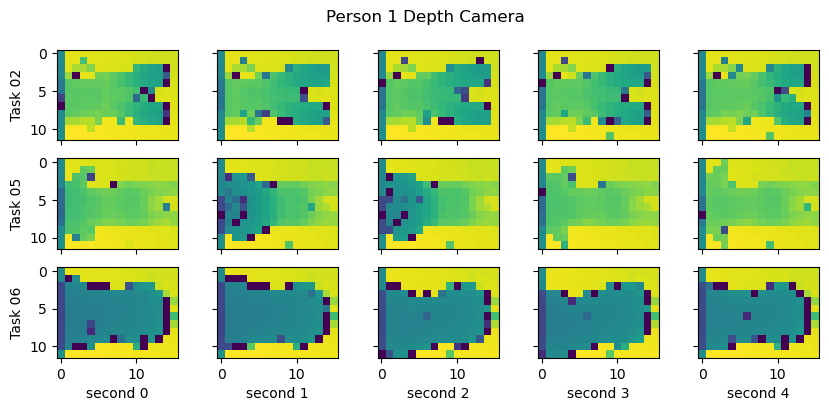

In [9]:
fig, axs = plt.subplots(3, 5, figsize=(10,4))
fig.suptitle('Person 1 Depth Camera')

task = []
for i, person_task in enumerate(person1_tasks_dc):
    for j in range(5):
        task.append('Task ' + person_task['exercise_id'])
        img = np.reshape(person_task['df'].iloc[j,1:].to_numpy(), (12, 16))
        axs[i, j].imshow(img, interpolation='nearest')

for i, ax in enumerate(axs.flat):
    ax.set(xlabel='second ' + str(i%5), ylabel=task[i])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


### Person 5 Depth Camera 

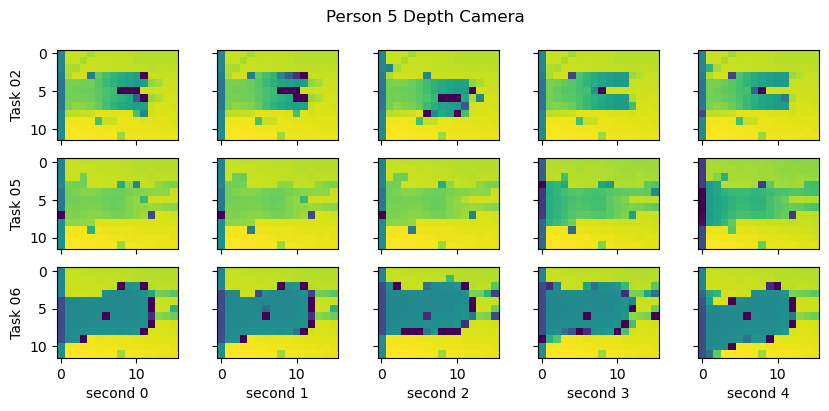

In [10]:
fig, axs = plt.subplots(3, 5, figsize=(10,4))
fig.suptitle('Person 5 Depth Camera')

task = []
for i, person_task in enumerate(person5_tasks_dc):
    for j in range(5):
        task.append('Task ' + person_task['exercise_id'])
        img = np.reshape(person_task['df'].iloc[j,1:].to_numpy(), (12, 16))
        axs[i, j].imshow(img, interpolation='nearest')

for i, ax in enumerate(axs.flat):
    ax.set(xlabel='second ' + str(i%5), ylabel=task[i])

for ax in axs.flat:
    ax.label_outer()


### Person 1 Accelerometer

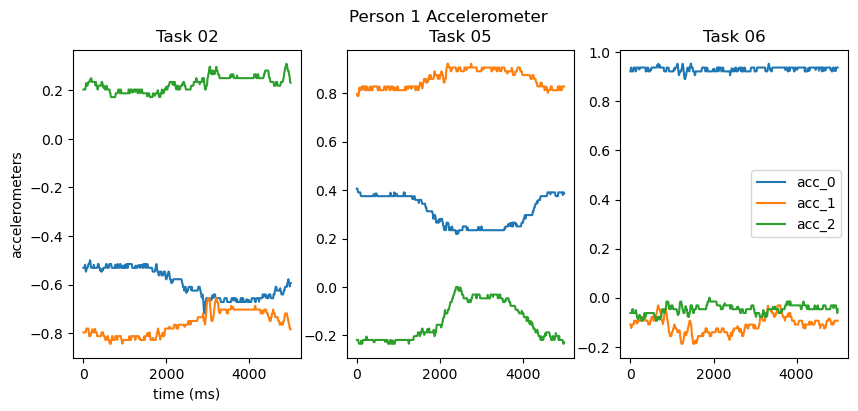

In [11]:
f = plt.figure(figsize=(10,4))
f.suptitle('Person 1 Accelerometer')

f.add_subplot(1,3,1, title = "Task 02")
plt.plot(person1_acc_ex2_win0['df']['time'], person1_acc_ex2_win0['df']['acc_0'], label ="acc_0")
plt.plot(person1_acc_ex2_win0['df']['time'], person1_acc_ex2_win0['df']['acc_1'], label ="acc_1")
plt.plot(person1_acc_ex2_win0['df']['time'], person1_acc_ex2_win0['df']['acc_2'], label ="acc_2")

plt.xlabel("time (ms)")
plt.ylabel("accelerometers")

f.add_subplot(1,3,2, title = "Task 05")
plt.plot(person1_acc_ex5_win0['df']['time'], person1_acc_ex5_win0['df']['acc_0'], label ="acc_0")
plt.plot(person1_acc_ex5_win0['df']['time'], person1_acc_ex5_win0['df']['acc_1'], label ="acc_1")
plt.plot(person1_acc_ex5_win0['df']['time'], person1_acc_ex5_win0['df']['acc_2'], label ="acc_2")

f.add_subplot(1,3,3, title = "Task 06")
plt.plot(person1_acc_ex6_win0['df']['time'], person1_acc_ex6_win0['df']['acc_0'], label ="acc_0")
plt.plot(person1_acc_ex6_win0['df']['time'], person1_acc_ex6_win0['df']['acc_1'], label ="acc_1")
plt.plot(person1_acc_ex6_win0['df']['time'], person1_acc_ex6_win0['df']['acc_2'], label ="acc_2")

plt.legend()
plt.show()

### Person 5 Accelerometer

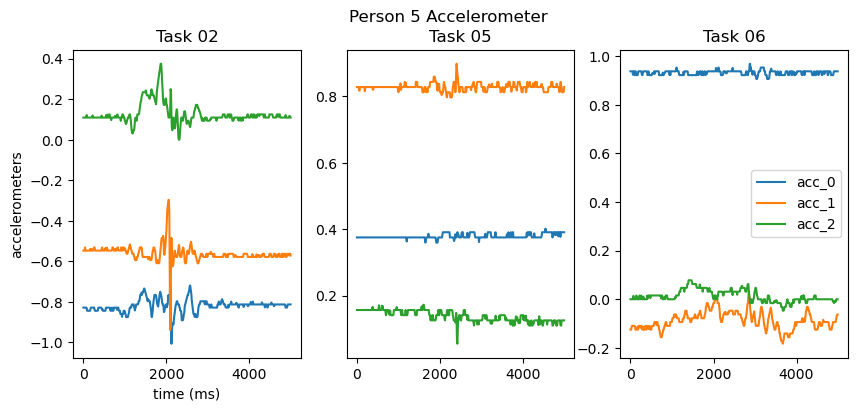

In [12]:
f = plt.figure(figsize=(10,4))
f.suptitle('Person 5 Accelerometer')

f.add_subplot(1,3,1, title = "Task 02")
plt.plot(person5_acc_ex2_win0['df']['time'], person5_acc_ex2_win0['df']['acc_0'], label ="acc_0")
plt.plot(person5_acc_ex2_win0['df']['time'], person5_acc_ex2_win0['df']['acc_1'], label ="acc_1")
plt.plot(person5_acc_ex2_win0['df']['time'], person5_acc_ex2_win0['df']['acc_2'], label ="acc_2")

plt.xlabel("time (ms)")
plt.ylabel("accelerometers")

f.add_subplot(1,3,2, title = "Task 05")
plt.plot(person5_acc_ex5_win0['df']['time'], person5_acc_ex5_win0['df']['acc_0'], label ="acc_0")
plt.plot(person5_acc_ex5_win0['df']['time'], person5_acc_ex5_win0['df']['acc_1'], label ="acc_1")
plt.plot(person5_acc_ex5_win0['df']['time'], person5_acc_ex5_win0['df']['acc_2'], label ="acc_2")

f.add_subplot(1,3,3, title = "Task 06")
plt.plot(person5_acc_ex6_win0['df']['time'], person5_acc_ex6_win0['df']['acc_0'], label ="acc_0")
plt.plot(person5_acc_ex6_win0['df']['time'], person5_acc_ex6_win0['df']['acc_1'], label ="acc_1")
plt.plot(person5_acc_ex6_win0['df']['time'], person5_acc_ex6_win0['df']['acc_2'], label ="acc_2")

plt.legend()

plt.show()

## Task 1.2

In [13]:
# 1.2. Split samples based on subject ID into training and testing datasets for futher experiments

def split_acc_dc_and_pair(df):
    """
    Split df into 2 dataframes, acceleration and dc.
    For Training (2973,7) this results in one df of (1487,7) and (1486,7)
    For Testing (1196,7) this result in on df of (598,7) and (598,7)
    
    Sensor_code and sensor columns are dropped.
    
    The 2 resulting df are merged using common_columns as keys.
    The merge drops unpaired data with how=right as dc has less data than acc
    
    Returns Pandas Dataframe
    
    """
    
    #Split df into acc and dc
    df_acc = df[df['sensor_code'] == 'act']
    df_dc = df[df['sensor_code'] == 'dc']
    
 
    #drop unnecessary columns
    df_acc = df_acc.drop(['sensor_code','sensor'], axis=1)
    df_dc = df_dc.drop(['sensor_code','sensor'], axis=1)
    
    #pair acc and dc by common columns, 
    # as column df is repeated, suffixes ensures that df_acc and df_dc is created
    common_columns = ['subject_id', 'exercise_id', 'trial', 'window_idx']
                    
    new_df = pd.merge(df_acc, df_dc, how='right', suffixes=('_acc', '_dc'),
                      left_on=common_columns, 
                      right_on=common_columns)

    return new_df

<p>
    Train persons with subject id 1 to 7 <br>
    Test persons with subject id 8 to 10

In [14]:
df_train = df_records_windowed[df_records_windowed['subject_id'].astype(int) <= 7]
df_test = df_records_windowed[df_records_windowed['subject_id'].astype(int) >= 8]

df_train_pair = split_acc_dc_and_pair(df_train)
df_test_pair = split_acc_dc_and_pair(df_test)


In [15]:
# Info
print("Training dataset")
print('Number of rows: ', len(df_train_pair))
print('Number of columns: ', len(df_train_pair.columns))
print('Column names: ', df_train_pair.columns.values)
print("Training head:")
display(df_train_pair.head())
print("Training first window of df_acc")
display(df_train_pair["df_acc"].iloc[0].head())
print("Training first window of df_dc")
display(df_train_pair["df_dc"].iloc[0].head())

Training dataset
Number of rows:  1486
Number of columns:  6
Column names:  ['subject_id' 'exercise_id' 'trial' 'df_acc' 'window_idx' 'df_dc']
Training head:


,subject_id,exercise_id,trial,df_acc,window_idx,df_dc
0,02,04,2,time acc_0 acc_1 acc_2 0 ...,0,time dc_0 dc_1 dc_2 dc_3 d...
1,02,04,2,time acc_0 acc_1 acc_2 200 ...,1,time dc_0 dc_1 dc_2 dc_3 d...
2,02,04,2,time acc_0 acc_1 acc_2 400 ...,2,time dc_0 dc_1 dc_2 dc_3 d...
3,02,04,2,time acc_0 acc_1 acc_2 60...,3,time dc_0 dc_1 dc_2 dc_3 ...
4,02,04,2,time acc_0 acc_1 acc_2 80...,4,time dc_0 dc_1 dc_2 dc_3 ...


Training first window of df_acc


,time,acc_0,acc_1,acc_2
0,0.0,0.034375,-0.450000,-0.815625
1,10.0,0.031250,-0.480903,-0.798611
2,20.0,0.059375,-0.498437,-0.768750
3,30.0,0.076563,-0.500000,-0.751563
4,40.0,0.092188,-0.514062,-0.735938


Training first window of df_dc


,time,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,...,dc_182,dc_183,dc_184,dc_185,dc_186,dc_187,dc_188,dc_189,dc_190,dc_191
0,0.0,0.4942,0.9815,0.9738,0.9668,0.9618,0.9530,0.9499,0.9437,0.9383,...,0.9479,0.9391,0.9360,0.9329,0.9252,0.9198,0.9167,0.9106,0.9015,0.8993
1,1000.0,0.4942,0.9815,0.9738,0.9697,0.9618,0.9530,0.9499,0.9460,0.9376,...,0.9499,0.9391,0.9352,0.9329,0.9252,0.9198,0.9167,0.9113,0.9005,0.8982
2,2000.0,0.4942,0.9815,0.9738,0.9668,0.9618,0.9539,0.9507,0.9429,0.9391,...,0.9470,0.9391,0.9352,0.9329,0.9244,0.9206,0.9167,0.9106,0.9024,0.8982
3,3000.0,0.4942,0.9805,0.9748,0.9688,0.9618,0.9549,0.9514,0.9445,0.9391,...,0.9499,0.9391,0.9352,0.9329,0.9244,0.9229,0.9167,0.9106,0.9024,0.8982
4,4000.0,0.4926,0.9815,0.9738,0.9678,0.9618,0.9568,0.9499,0.9445,0.9383,...,0.9470,0.9391,0.9360,0.9329,0.9244,0.9229,0.9167,0.9106,0.9005,0.8988


In [16]:
print("Testing dataset")
print('Number of rows: ', len(df_test_pair))
print('Number of columns: ', len(df_test_pair.columns))
print('Column names of test set: ', df_test_pair.columns.values)
print("Testing head:")
display(df_test_pair.head())
print("Testing first window of df_acc")
display(df_train_pair["df_acc"].iloc[0].head())
print("Testing first window of df_dc")
display(df_train_pair["df_dc"].iloc[0].head())

Testing dataset
Number of rows:  598
Number of columns:  6
Column names of test set:  ['subject_id' 'exercise_id' 'trial' 'df_acc' 'window_idx' 'df_dc']
Testing head:


,subject_id,exercise_id,trial,df_acc,window_idx,df_dc
0,09,06,1,time acc_0 acc_1 acc_2 0 ...,0,time dc_0 dc_1 dc_2 dc_3 dc_...
1,09,06,1,time acc_0 acc_1 acc_2 200 ...,1,time dc_0 dc_1 dc_2 dc_3 dc_...
2,09,06,1,time acc_0 acc_1 acc_2 400 ...,2,time dc_0 dc_1 dc_2 dc_3 dc_...
3,09,06,1,time acc_0 acc_1 acc_2 60...,3,time dc_0 dc_1 dc_2 dc_3 d...
4,09,06,1,time acc_0 acc_1 acc_2 80...,4,time dc_0 dc_1 dc_2 dc_3 ...


Testing first window of df_acc


,time,acc_0,acc_1,acc_2
0,0.0,0.034375,-0.450000,-0.815625
1,10.0,0.031250,-0.480903,-0.798611
2,20.0,0.059375,-0.498437,-0.768750
3,30.0,0.076563,-0.500000,-0.751563
4,40.0,0.092188,-0.514062,-0.735938


Testing first window of df_dc


,time,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,...,dc_182,dc_183,dc_184,dc_185,dc_186,dc_187,dc_188,dc_189,dc_190,dc_191
0,0.0,0.4942,0.9815,0.9738,0.9668,0.9618,0.9530,0.9499,0.9437,0.9383,...,0.9479,0.9391,0.9360,0.9329,0.9252,0.9198,0.9167,0.9106,0.9015,0.8993
1,1000.0,0.4942,0.9815,0.9738,0.9697,0.9618,0.9530,0.9499,0.9460,0.9376,...,0.9499,0.9391,0.9352,0.9329,0.9252,0.9198,0.9167,0.9113,0.9005,0.8982
2,2000.0,0.4942,0.9815,0.9738,0.9668,0.9618,0.9539,0.9507,0.9429,0.9391,...,0.9470,0.9391,0.9352,0.9329,0.9244,0.9206,0.9167,0.9106,0.9024,0.8982
3,3000.0,0.4942,0.9805,0.9748,0.9688,0.9618,0.9549,0.9514,0.9445,0.9391,...,0.9499,0.9391,0.9352,0.9329,0.9244,0.9229,0.9167,0.9106,0.9024,0.8982
4,4000.0,0.4926,0.9815,0.9738,0.9678,0.9618,0.9568,0.9499,0.9445,0.9383,...,0.9470,0.9391,0.9360,0.9329,0.9244,0.9229,0.9167,0.9106,0.9005,0.8988


# 2. Feature extraction and fusion for unimodal classification

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 2.</b>

Use the training dataset prepared in task 1. to build models based on the combination of principal component analysis (PCA), linear discriminant analysis (LDA), and nearest neighbour (NN) classifier for each modality separately and evaluate the model on test dataset. Do the subtasks given as
<br>
<br>
<p> <b>2.1</b> Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data (e.g., using scikit-learn implementations). Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. You should also standardize the values to zero mean and unit variance before the transformations. Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) and fit LDA with 5-dimensional subspace. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 3x(5+5). Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 24-25) using NN method. Evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br>
<p> <b>2.2</b> Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 2.1-2.2.
    
</div>

In [17]:
# Imports for task 2
from scipy import signal
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics


## Task 2.1

### Main Functions

In [18]:
def downsample_acc(data):
    """
    Downsamples the given data row by row to 125x3 and drops time axis

    Receives pandas series (1486,)
    Returns numpy matrix  (1486,125,3)
    """
    resample_size=125
    resampled_data = np.zeros((len(data),resample_size, 3))
    for i, row in enumerate(data):
        row = signal.resample(row.drop(['time'], axis = 1), resample_size)
        resampled_data[i] = row

    return resampled_data


def stand_shape_acc(train_data, test_data):
    """
    standardizes the training and testing acc data - x,y,z axis wise
    used training set mean and std to standardize the testing set
 
    Receives 2 numpy matrix (X, 125,3) 
    Returns 2 numpy matrices (X, 125, 3)
    """
    # Reshape as a m*n matrix  (1486*125, 3) for calculating mean and std x,y,z wise
    train_packed = train_data.reshape((train_data.shape[0] * train_data.shape[1], 3))
    
    means = np.mean(train_packed, axis = 0)
    stds = np.std(train_packed,axis = 0)

    train_data = (train_data - means) / stds
    test_data = (test_data - means) / stds
    
    return train_data,test_data
    

# fit to PCA dim
def pca_transform_acc_dim(train_data, test_data, dim):
    """
    Fits data to the PCA dimension.

    Receives 2 numpy matrices (X, 125,3) 
    Returns 2 numpy matrices (X, 5, 3)
    """
    pca = PCA(n_components=dim)
    pca_train = np.empty((train_data.shape[0], dim, train_data.shape[2]))
    pca_test = np.empty((test_data.shape[0], dim, test_data.shape[2]))

    for i in range(train_data.shape[2]):
        pca_train[:,:,i] = pca.fit_transform(train_data[:,:,i])
        pca_test[:,:,i] = pca.transform(test_data[:,:,i])

    return pca_train, pca_test


# fit to LDA dim
def lda_transform_acc(train_data, test_data, dim):
    """
    Fits data to the PCA dimension.
    
    Receives 2 numpy matrices (X, 125, 3)
    Returns 2 numpy matrices (X, 5, 3)
    """
       
    lda = LinearDiscriminantAnalysis(n_components=dim)
    lda_train = np.empty((train_data.shape[0], dim, train_data.shape[2]))
    lda_test = np.empty((test_data.shape[0], dim, test_data.shape[2]))

    for i in range(train_data.shape[2]):
        lda_train[:,:,i] = lda.fit_transform(train_data[:,:,i], train_set['exercise_id'])
        lda_test[:,:,i] = lda.transform(test_data[:,:,i])
    
    return lda_train, lda_test


def concate(x):
    """
    Creates a new dataframe (while combining given variables data) 
    from the given value and returns it as
    a numpy array.
    """
    new_df = pd.concat([x[0], x[1]], axis=1, ignore_index=True)
    return new_df.to_numpy()


def distance_acc(test_sample):
    """
    Fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 24-25) using NN method
    """
    pca_distance = np.sum(np.sum(np.square(test_sample[:,0:5] - train_pca_lda_acc[:,:,0:5]),axis=2),axis=1)
    lda_distance = np.sum(np.sum(np.square(test_sample[:,5:10] - train_pca_lda_acc[:,:,5:10]),axis=2),axis=1)
    pca_distance = scale_distance(pca_distance)    
    lda_distance = scale_distance(lda_distance)
    return [pca_distance, lda_distance]


def scale_distance(distance):
    """
    Min max scaling of the given data.
    """
    scaled_distance = (distance - np.min(distance)) / (np.max(distance) - np.min(distance))
    return scaled_distance


def fuse_average(dists):
    """
    Gives the given fusions average.
    """
    fused_avg = (dists[0] + dists[1]) / 2
    return fused_avg

   
def predict(fused_avg):
    """
    Returns predicted excercises id
    """
    return train_set['exercise_id'][np.argmin(fused_avg)]


def stats_and_cf(test_predictions, test_true_labels):
    """
    Estimates precision, recall score, accuracy score, f1 score
    and displays the confusion matrix.
    """
    class_labels = ['Ex1', 'Ex2', 'Ex3', 'Ex4', 'Ex5', 'Ex6', 'Ex7']

    precision = metrics.precision_score(test_predictions, test_true_labels, average=None, zero_division=0)
    recall = metrics.recall_score(test_predictions, test_true_labels,average=None, zero_division=0)
    f1 = (1 / len(class_labels)) * np.sum(2 * (precision * recall) / (precision + recall))

    print("Classification report: \n", metrics.classification_report(
        test_predictions, test_true_labels, target_names=class_labels, zero_division=0))
    print("Precision score: \n", precision)
    print("Recall score: \n", recall)
    print("Accuracy score: \n", metrics.accuracy_score(test_predictions, test_true_labels))
    print("F1 score: \n", f1)

    # Confusion matrix for testing set
    cm_test = metrics.confusion_matrix(test_predictions, test_true_labels)
    metrics.ConfusionMatrixDisplay(cm_test, display_labels=class_labels).plot()

### Preparation: downsample and standardization

In [19]:
# Downsample from 100 Hz to 25 Hz to get 125x3 matrix of data for each 5 sec window. 

# Obtain accelerometer data from training set
# Copy original dataset so it is not affected
train_set = df_train_pair.copy()
test_set = df_test_pair.copy()

# drop time axis, downsample the data and standardize
train_acc = downsample_acc(train_set['df_acc'])
test_acc = downsample_acc(test_set['df_acc'])
train_acc, test_acc = stand_shape_acc(train_acc, test_acc)


### PCA

In [20]:
# Using training dataset, fit PCA with 5-dimensional subspace 

# Create PCA with 5 dimensions
dim = 5
pca_train, pca_test = pca_transform_acc_dim(train_acc, test_acc,dim)
print("PCA train transformed shape: ", pca_train.shape)

# Insert the numpy data in the pandas dataframe
train_set['df_acc_pca'] = [pd.DataFrame(data=row.T) for row in pca_train]
test_set['df_acc_pca'] = [pd.DataFrame(data=row.T) for row in pca_test]

# Check shape and data
print("The shape of training data in PCA df: ", train_set.shape)
print("The shape of testing data in PCA df: ", test_set.shape)

print("Training df_acc data check: ")
display(train_set['df_acc_pca'][0])
print("Testing df_acc data check: ")
display(test_set['df_acc_pca'][0])

PCA train transformed shape:  (1486, 5, 3)
The shape of training data in PCA df:  (1486, 7)
The shape of testing data in PCA df:  (598, 7)
Training df_acc data check: 


,0,1,2,3,4
0,-1.976342,1.101811,-1.795259,-4.611724,1.334735
1,2.625164,0.070157,-1.411673,5.717512,1.349583
2,22.587284,0.240485,-0.180175,0.482815,-0.057101


Testing df_acc data check: 


,0,1,2,3,4
0,-15.733857,-0.025024,0.046983,-0.052868,0.027600
1,7.191441,0.089863,0.364180,0.074191,0.327730
2,-0.222786,0.454250,0.428008,-0.204023,-0.133607


### LDA

In [21]:
# Using training dataset, fit LDA with 5-dimensional subspace 

# Create LDA with 5 dimensions (same dim as PCA)
dim = 5
lda_train, lda_test = lda_transform_acc(train_acc, test_acc,dim)
print("LDA train transformed shape: ", lda_train.shape)

# Data to Pandas df frame
train_set['df_acc_lda'] = [pd.DataFrame(data=row.T) for row in lda_train]
test_set['df_acc_lda'] = [pd.DataFrame(data=row.T) for row in lda_test]

# Check shape and data
print("The shape of training data in LDA df: ", train_set.shape)
print("The shape of training data in LDA df: ", test_set.shape)

print("df_acc data check: ",)
display(train_set['df_acc_lda'][0])
print("Testing df_acc data check: ")
display(test_set['df_acc_lda'][0])   


LDA train transformed shape:  (1486, 5, 3)
The shape of training data in LDA df:  (1486, 8)
The shape of training data in LDA df:  (598, 8)
df_acc data check: 


,0,1,2,3,4
0,-0.719193,-0.128671,-1.154970,3.325999,-0.361732
1,-0.351841,0.850966,2.280915,-0.160598,0.989720
2,2.258039,2.003296,-1.675041,2.108481,2.890629


Testing df_acc data check: 


,0,1,2,3,4
0,1.792203,1.242722,-0.264971,-0.167123,0.624343
1,-0.057798,0.302613,-1.037137,1.352371,-1.307967
2,-1.216526,-0.694540,1.483920,-2.491090,-0.091446


### Evaluation and Fusion

Classification report: 
               precision    recall  f1-score   support

         Ex1       0.11      0.82      0.19        11
         Ex2       0.35      0.21      0.26       138
         Ex3       0.26      0.29      0.27        76
         Ex4       0.86      1.00      0.93        69
         Ex5       0.67      0.63      0.65        95
         Ex6       0.68      0.37      0.48       163
         Ex7       0.35      0.65      0.46        46

    accuracy                           0.47       598
   macro avg       0.47      0.57      0.46       598
weighted avg       0.53      0.47      0.47       598

Precision score: 
 [0.10588235 0.3452381  0.25581395 0.8625     0.66666667 0.68181818
 0.35294118]
Recall score: 
 [0.81818182 0.21014493 0.28947368 1.         0.63157895 0.36809816
 0.65217391]
Accuracy score: 
 0.4665551839464883
F1 score: 
 0.461613180200539


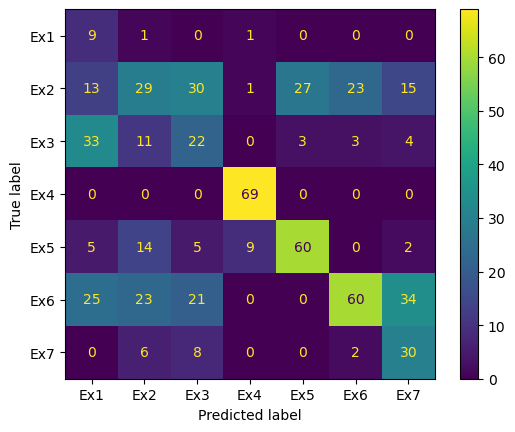

In [22]:
# Concatenate each sequence to single vector size of 3x(5+5). 
# Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 24-25) using NN method. 
# Evaluate the performance on testset. Show confusion matrix and F1 scores of the results.

# Fusion of PCA and LDA data to 3x10 (3x5+5) shape
train_pca_lda_acc = np.array([concate(x) for i, x in enumerate(zip(train_set['df_acc_pca'], train_set['df_acc_lda']))])
test_pca_lda_acc = np.array([concate(x) for i, x in enumerate(zip(test_set['df_acc_pca'], test_set['df_acc_lda']))])

# Evaluation of the performance with test set
test_predictions = [predict(fuse_average(distance_acc(x))) for i, x in enumerate(test_pca_lda_acc)]
stats_and_cf(test_predictions, test_set['exercise_id'].to_numpy())


### 2.1 Acceleration model results:

Overall accuracy: 0.47<br>
Overall F1 score: 0.46<br>

Predicts exercise 4 the best, with scores:<br>
precision: 0.86<br>
recall: 1<br>
F1 score: 0.93<br>
 
Exercise 4 seems to have very distinct features. In the confusion matrix only exercise 5 seems to have maybe some small similarities to 4.<br>

Model has trouble predicting exercise 1, performs the weakest, with scores:<br>
precision: 0.11<br>
recall: 0.82<br>
F1 score: 0.19<br>

Model has also troubles with exercise 2 (accuracy 0.35) and 3 (accuracy 0.26).<br>

## Task 2.2

### Main Functions

In [23]:
def standardize_dc(train_data, test_data):
    """
     standardize the values to zero mean and unit variance
    """
    for i in range(train_data.shape[1]):
        test_data[:,i,:] = (test_data[:,i,:] - np.mean(train_data[:,i,:],axis=0)) / np.std(train_data[:,i,:],axis=0)
        train_data[:,i,:] = (train_data[:,i,:] - np.mean(train_data[:,i,:],axis=0)) / np.std(train_data[:,i,:],axis=0)
    
    return train_data, test_data


def pca_transform_dc(train_data, test_data, dim):
    """
    Fits dc data to the PCA dimension.
    """
    pca = PCA(n_components=dim)
    pca_train = np.empty((train_data.shape[0], train_data.shape[1], dim))
    pca_test = np.empty((test_data.shape[0], test_data.shape[1], dim)) 

    for i in range(train_data.shape[1]):
        pca_train[:,i,:] = pca.fit_transform(train_data[:,i,:])
        pca_test[:,i,:] = pca.transform(test_data[:,i,:])

    return pca_train, pca_test


def lda_transform_dc(train_data, test_data, dim):
    """
    Fits dc data to the LDA dimension.
    """
    lda = LinearDiscriminantAnalysis(n_components=dim)
    lda_train = np.empty((train_data.shape[0], train_data.shape[1], dim))
    lda_test = np.empty((test_data.shape[0], test_data.shape[1], dim))

    for i in range(train_data.shape[1]):
        lda_train[:,i,:] = lda.fit_transform(train_data[:,i,:],train_set['exercise_id'])
        lda_test[:,i,:] = lda.transform(test_data[:,i,:])
    
    return lda_train,lda_test


def distance_dc(test_sample):
    """
    Fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 24-25) using NN method
    """
    pca_distance = np.sum(np.sum(np.sum(np.square(test_sample[:,:,0:5] - train_pca_lda_df[:,:,:,0:5]),axis=2),axis=1), axis = 1)
    lda_distance = np.sum(np.sum(np.sum(np.square(test_sample[:,:,5:10] - train_pca_lda_df[:,:,:,5:10]),axis=2),axis=1), axis=1)
    pca_distance = scale_distance(pca_distance)    
    lda_distance = scale_distance(lda_distance)
    
    return [pca_distance, lda_distance]


def predict(fused_avg):
    """
    Returns predicted excercises id
    """
    return train_set['exercise_id'][np.argmin(fused_avg)]

### Preparation: standardization

In [24]:
# standardize the values to zero mean and unit variance before the transformations and drop time axis from the data
train_dc = np.array([x.drop(['time'], axis = 1).to_numpy() for x in train_set['df_dc']])
test_dc = np.array([x.drop(['time'], axis = 1).to_numpy() for x in test_set['df_dc']])
train_dc, test_dc = standardize_dc(train_dc, test_dc)

### PCA

In [25]:
# Using training dataset, fit PCA with 5-dimensional subspace 

dim=5
pca_train, pca_test = pca_transform_dc(train_dc, test_dc,dim)
print("PCA train transformed shape: ", pca_train.shape)

train_set['df_dc_pca'] = [x.reshape((5,1,5)) for i, x in enumerate(pca_train)]
test_set['df_dc_pca'] = [x.reshape((5,1,5)) for i, x in enumerate(pca_test)]

# Check shape and data
print("The shape of training data in PCA df dc: ", train_set['df_dc_pca'][0].shape)
print("The shape of training data in PCA df dc: ", test_set['df_dc_pca'][0].shape)
print("df_dc data check: ",)
display(train_set['df_dc_pca'][0])
print("Testing df_dc data check: ")
display(test_set['df_dc_pca'][0])


PCA train transformed shape:  (1486, 5, 5)
The shape of training data in PCA df dc:  (5, 1, 5)
The shape of training data in PCA df dc:  (5, 1, 5)
df_dc data check: 


array([[[-7.19131684,  2.93514405,  2.5058922 , -0.68290394,
         -0.70469647]],

       [[-6.69086071,  3.21515353, -2.32129196,  0.50884334,
         -1.41902602]],

       [[-6.16906534,  1.37089763,  2.65861311,  1.68790262,
         -1.73960268]],

       [[-5.5907916 ,  2.67740595, -2.24680575,  0.36459898,
         -1.96565055]],

       [[-5.4158525 ,  2.72107134,  2.69699006, -0.84361767,
         -1.33255008]]])

Testing df_dc data check: 


array([[[17.18638743,  0.09351859, -1.98052789,  3.38024949,
          0.3139184 ]],

       [[16.52461174, -4.18100259,  3.93758603,  8.20705929,
          1.12299349]],

       [[17.44812667, -1.12635363, -3.51767058,  6.57554334,
         -1.36173495]],

       [[20.02200702,  5.53986028,  1.31550806,  0.16138147,
          8.56442912]],

       [[17.0579696 ,  4.25757369, -3.43966505, -0.56198293,
          6.18016385]]])

### LDA

In [26]:
# Using training dataset, fit LDA with 5-dimensional subspace 

# LDA with 5 dimensions
dim=5
lda_train, lda_test = lda_transform_dc(train_dc, test_dc,dim)
print("LDA train transformed shape: ", lda_train.shape)

train_set['df_dc_lda'] = [x.reshape((5,1,5)) for i, x in enumerate(lda_train)]
test_set['df_dc_lda'] = [x.reshape((5,1,5)) for i, x in enumerate(lda_test)]

# Check shape and data
print("The shape of training data in LDA df dc: ", train_set['df_dc_lda'][0].shape)
print("The shape of training data in LDA df dc: ", test_set['df_dc_lda'][0].shape)
print("df_dc data check: ",)
display(train_set['df_dc_lda'][0])
print("Testing df_dc data check: ")
display(test_set['df_dc_lda'][0])

LDA train transformed shape:  (1486, 5, 5)
The shape of training data in LDA df dc:  (5, 1, 5)
The shape of training data in LDA df dc:  (5, 1, 5)
df_dc data check: 


array([[[-4.62922908,  1.61921075, -1.56843986, -1.5383071 ,
         -1.29628144]],

       [[-3.54673665,  1.22873465, -1.81072237, -3.20192949,
          0.43137898]],

       [[-1.49757623,  2.10463374, -1.52953901, -0.86142581,
         -0.7147292 ]],

       [[-1.72434906,  0.60943278, -1.86375977, -1.36324558,
          2.0576432 ]],

       [[-1.24496272,  0.89978479, -3.97970058, -2.86919267,
          3.30389336]]])

Testing df_dc data check: 


array([[[ 1.01274234e+01, -3.86598271e+00, -7.69153999e-02,
         -1.63751714e+00, -1.21511473e+00]],

       [[ 1.12699826e+01, -3.16381963e+00, -2.48710771e+00,
          1.45429879e+00,  1.45374460e+00]],

       [[ 1.11102807e+01, -2.84352276e+00, -1.14562507e+00,
          9.73939769e-03, -1.12628473e+00]],

       [[ 1.06406086e+01, -4.54641606e-01,  6.32635772e-01,
         -1.20190551e+00, -1.15175155e+00]],

       [[ 1.04732954e+01, -1.38393757e+00,  4.57121084e-01,
         -1.89541617e+00, -2.09720185e+00]]])

### Evaluation and fusion

The shape of training data in LDA_PCA df dc:  (1486, 5, 1, 10)
The shape of training data in LDA_PCA df dc:  (598, 5, 1, 10)
df_dc data check: 


array([[[-7.19131684,  2.93514405,  2.5058922 , -0.68290394,
         -0.70469647, -4.62922908,  1.61921075, -1.56843986,
         -1.5383071 , -1.29628144]],

       [[-6.69086071,  3.21515353, -2.32129196,  0.50884334,
         -1.41902602, -3.54673665,  1.22873465, -1.81072237,
         -3.20192949,  0.43137898]],

       [[-6.16906534,  1.37089763,  2.65861311,  1.68790262,
         -1.73960268, -1.49757623,  2.10463374, -1.52953901,
         -0.86142581, -0.7147292 ]],

       [[-5.5907916 ,  2.67740595, -2.24680575,  0.36459898,
         -1.96565055, -1.72434906,  0.60943278, -1.86375977,
         -1.36324558,  2.0576432 ]],

       [[-5.4158525 ,  2.72107134,  2.69699006, -0.84361767,
         -1.33255008, -1.24496272,  0.89978479, -3.97970058,
         -2.86919267,  3.30389336]]])

Testing df_dc data check: 


array([[[ 1.71863874e+01,  9.35185945e-02, -1.98052789e+00,
          3.38024949e+00,  3.13918396e-01,  1.01274234e+01,
         -3.86598271e+00, -7.69153999e-02, -1.63751714e+00,
         -1.21511473e+00]],

       [[ 1.65246117e+01, -4.18100259e+00,  3.93758603e+00,
          8.20705929e+00,  1.12299349e+00,  1.12699826e+01,
         -3.16381963e+00, -2.48710771e+00,  1.45429879e+00,
          1.45374460e+00]],

       [[ 1.74481267e+01, -1.12635363e+00, -3.51767058e+00,
          6.57554334e+00, -1.36173495e+00,  1.11102807e+01,
         -2.84352276e+00, -1.14562507e+00,  9.73939769e-03,
         -1.12628473e+00]],

       [[ 2.00220070e+01,  5.53986028e+00,  1.31550806e+00,
          1.61381473e-01,  8.56442912e+00,  1.06406086e+01,
         -4.54641606e-01,  6.32635772e-01, -1.20190551e+00,
         -1.15175155e+00]],

       [[ 1.70579696e+01,  4.25757369e+00, -3.43966505e+00,
         -5.61982927e-01,  6.18016385e+00,  1.04732954e+01,
         -1.38393757e+00,  4.57121084e-01, -

Classification report: 
               precision    recall  f1-score   support

         Ex1       1.00      0.41      0.58       207
         Ex2       0.63      0.45      0.53       117
         Ex3       0.01      0.07      0.02        15
         Ex4       0.26      0.95      0.41        22
         Ex5       0.73      1.00      0.85        66
         Ex6       0.35      0.97      0.52        32
         Ex7       0.96      0.59      0.73       139

    accuracy                           0.57       598
   macro avg       0.57      0.63      0.52       598
weighted avg       0.80      0.57      0.61       598

Precision score: 
 [1.         0.63095238 0.01162791 0.2625     0.73333333 0.35227273
 0.96470588]
Recall score: 
 [0.41062802 0.45299145 0.06666667 0.95454545 1.         0.96875
 0.58992806]
Accuracy score: 
 0.5668896321070234
F1 score: 
 0.5194407172778946


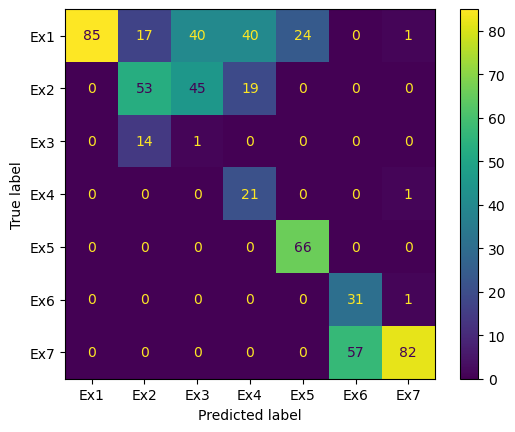

In [27]:

# Combine PCA and LDA data to 5x1x(5+5) shape    
train_pca_lda_df = np.array([np.dstack([x[0], x[1]]) for i, x in enumerate(
    zip(train_set['df_dc_pca'], train_set['df_dc_lda']))])
test_pca_lda_df = np.array([np.dstack([x[0], x[1]]) for i, x in enumerate(
    zip(test_set['df_dc_pca'], test_set['df_dc_lda']))])

# Check shape and data
print("The shape of training data in LDA_PCA df dc: ", train_pca_lda_df.shape)
print("The shape of training data in LDA_PCA df dc: ", test_pca_lda_df.shape)
print("df_dc data check: ")
display(train_pca_lda_df[0])
print("Testing df_dc data check: ")
display(test_pca_lda_df[0])

# Evaluate
test_predictions = [predict(fuse_average(distance_dc(x))) for i, x in enumerate(test_pca_lda_df)]
stats_and_cf(test_predictions, test_set['exercise_id'].to_numpy())

### 2.2 Depth camera model results


Overall accuracy: 0.57<br>
Overall F1 score: 0.52<br><br>

Predicts exercise 1 best, with scores: <br>
precison: 1<br>
F1 score: 0.58 (due to the low recall)<br>
recall: 0.41<br>
Exercise 3 had the lowest scores overall:<br>
precison: 0.01<br>
F1 score: 0.02<br>
recall: 0.07<br><br>

Exercise 5 had the highest F1 score (0.85), it also had a very high recall score (1) with exercise 6 (0.97) and exercise 4 (0.95).<br>
Exercise 7 was the only one with Exercise 1 to have precision over 0.9.<br><br>


2.Results comparison<br>

When compared to the accelaration feature-based model, the depth camera model performs better. The depth camera feature-based model achieves 0.57 accuracy with a 0.52 F1 score, while the acceleration feature-based model achieves 0.47 accuracy with a 0.46 F1 score. However, both models perform well in different classes. For example, the acceleration model predicts exercise 4 with a 0.93 F1 score, whereas the depth camera model predicts exercise 4 with a 0.41 F1 score.<br>

Fusion to improve accuracy. There are several fusion methods for multi-modal data. The multimodal data could be combined into a single representation before any processing is performed so before the creation of the models. We could also combine the separate models that were created in this task. We could also processes the individual modalities in parallel and combine the resulting representations in a deep learning network.<br>





# 3. Feature extraction and feature-level fusion for multimodal classification

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 3.</b>

Prepare new feature sets for each modality and combine them to single feature representation. Compare two classifiers from scikit-learn. Train classifiers using joint feature presentation. Evaluate and compare the result using testing dataset. Do the subtasks given as
<br>   
<br> 
<p> <b>3.1</b> Similar to task 2.1, calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window. In addition, for each window calculate mean and standard deviation of each three acc channels as statistical features, resulting 6-dimensional vector. Combine these to 36-dimensional final feature vector.</p>
<br>  
<p> <b>3.2</b> Similar to task 2.2, calculate the PCA for depth images using same setup, but now choose the 10 largest principal components as feature vector. Concatenate the image sequence forming 50-dimensional feature vector from each windowed example.</p>
<br> 
<p> <b>3.3</b> Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.</p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 3.1-3.3.
    
</div>

In [28]:
# Imports for 3
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)

### Main Functions

In [29]:
def acc_mean_std_vector(data):
    """
    Calculates for each window mean and standard deviation of 
    each three acc channels as statistical features, resulting 6-dimensional vector
    """
    meanstd = np.empty((data.shape[0], data.shape[2], 2))
    for i in range (data.shape[2]):
        meanstd[:,i,0] = np.mean(data[:,:,i])
        meanstd[:,i,1] = np.std(data[:,:,i],axis=1)
    return meanstd.reshape((meanstd.shape[0],-1))

def combine3(row):
    """
    Combines rows to a feature vector with 36 dim.
    """
    df_line = row[0].flatten(order='F')
    for i in range(1, len(row)):
        df_line = np.hstack((df_line,row[i]))
    return df_line


## Task 3.1 

In [30]:

# downsample and standardize the data
train_acc = downsample_acc(train_set['df_acc'])
test_acc = downsample_acc(test_set['df_acc'])
train_acc, test_acc = stand_shape_acc(train_acc,test_acc)

# PCA with dimension 10
dim = 10
train_acc, test_acc = pca_transform_acc_dim(train_acc, test_acc, dim)

# For each window calculate mean and standard deviation of each three acc channels 
# as statistical features, resulting 6-dimensional vector. 
train_meanstd = acc_mean_std_vector(train_acc)
test_meanstd = acc_mean_std_vector(test_acc)

# Combine to 36-dimensional final feature vector.
train_set['df_acc_pca'] = [combine3(x) for i,x in enumerate(zip(train_acc, train_meanstd))] # Combine function is called and train_mean_std_vector is placed at the end.
test_set['df_acc_pca'] = [combine3(x) for i,x in enumerate(zip(test_acc, test_meanstd))]

# Check data
print("train df_acc shape: ", train_set['df_acc_pca'][0].shape)


train df_acc shape:  (36,)


## Task 3.2

In [31]:
# Drop time column and standardize the data
train_dc = np.array([x.drop(['time'], axis = 1).to_numpy() for x in train_set['df_dc']])
test_dc = np.array([x.drop(['time'], axis = 1).to_numpy() for x in test_set['df_dc']])
train_dc, test_dc = standardize_dc(train_dc, test_dc)

# PCA with dimensions 10
dim = 10
pca_train, pca_test = pca_transform_dc(train_dc, test_dc,dim)

# Concatenate the image sequence forming 50-dimensional feature vector from each windowed example
train_set['df_dc_pca'] = [x.flatten() for i, x in enumerate(pca_train)]
test_set['df_dc_pca'] = [x.flatten() for i, x in enumerate(pca_test)]

# Check data
print("train df_dc data shape: ", train_set['df_dc_pca'][0].shape)

train df_dc data shape:  (50,)


## Task 3.3

Data shape and contents: 
 (86,)
Classification report: 
               precision    recall  f1-score   support

         Ex1       1.00      0.42      0.59       204
         Ex2       0.65      0.66      0.66        83
         Ex3       0.20      1.00      0.33        17
         Ex4       0.84      1.00      0.91        67
         Ex5       0.60      1.00      0.75        54
         Ex6       0.00      0.00      0.00         0
         Ex7       1.00      0.49      0.66       173

    accuracy                           0.61       598
   macro avg       0.61      0.65      0.56       598
weighted avg       0.87      0.61      0.66       598

Precision score: 
 [1.         0.6547619  0.19767442 0.8375     0.6        0.
 1.        ]
Recall score: 
 [0.41666667 0.6626506  1.         1.         1.         0.
 0.49132948]
Accuracy score: 
 0.6070234113712375
F1 score: 
 nan
Classification report: 
               precision    recall  f1-score   support

         Ex1       0.99      0.38

/tmp/ipykernel_4059/896741792.py:129: RuntimeWarning: invalid value encountered in true_divide
  f1 = (1 / len(class_labels)) * np.sum(2 * (precision * recall) / (precision + recall))


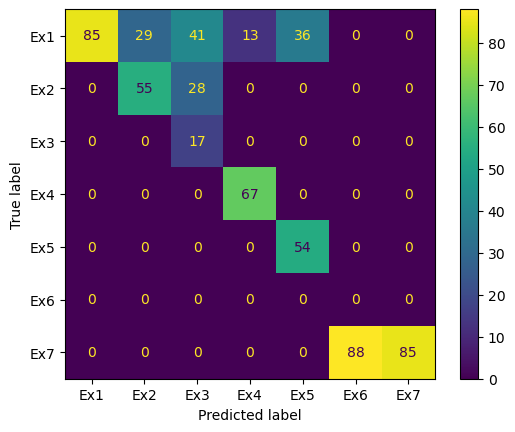

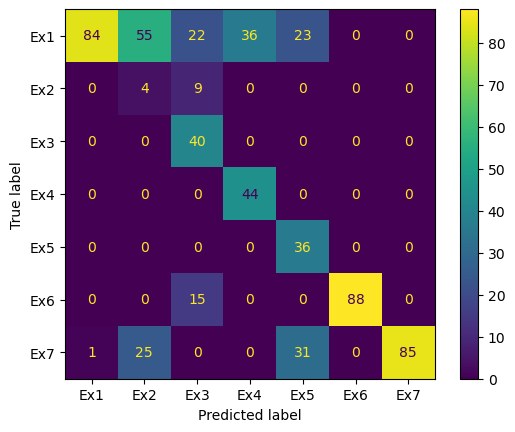

In [32]:
# --------------- Functions -------------------- #

def min_max_standardize(train_data, test_data):
    """ 
    Normalizes data between 0-1 using the training dataset
    """
    test_data = (test_data - np.min(train_data)) / (np.max(train_data) -  np.min(train_data))
    train_data = (train_data - np.min(train_data)) / (np.max(train_data) -  np.min(train_data))

    return train_data, test_data


# --------------- Main code -------------------- #

# Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. 
train_set3 = np.array([combine3(x) for i, x in enumerate(zip(train_set['df_acc_pca'], train_set['df_dc_pca']))])
test_set3 = np.array([combine3(x) for i, x in enumerate(zip(test_set['df_acc_pca'], test_set['df_dc_pca']))])

# Check data
print("Data shape and contents: \n", train_set3[0].shape)
#display(train_set3[0])

# Normalize data between 0-1 using the training dataset
train_set3, test_set3 = min_max_standardize(train_set3, test_set3)

# Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). 
# Train the classifiers
svm_clf = svm.SVC(kernel='rbf')
svm_clf.fit(train_set3, train_set['exercise_id'])
svm_predictions = svm_clf.predict(test_set3)

gnb_clf = GaussianNB()
gnb_clf.fit(train_set3, train_set['exercise_id'])
gnb_predictions = gnb_clf.predict(test_set3)

# Evaluate and compare classifiers on testset using confusion matrices and F1 scores.
stats_and_cf(svm_predictions, test_set['exercise_id'].to_numpy())
stats_and_cf(gnb_predictions, test_set['exercise_id'].to_numpy())

### Overall results Comparison

3.Overall results comparison<br>

The performance of both classifiers with feature extraction and fusion data using 10 dimensional data is much better than the indivudal feature predictions with 5 diemsional data in the previous task.
Previous task scores:<br>

Acceleration:<br>
Overall accuracy: 0.47<br>
Overall F1 score: 0.46<br>

depth camera:<br>
Overall accuracy: 0.57<br>
Overall F1 score: 0.52<br>

SVM:<br>
Overall accuracy: 0.61<br>
Overall F1 score: 0.56<br>

NaiveBayes classifier:<br>
Overall accuracy: 0.64<br>
Overall F1 score: 0.60<br>

SVM exercise 6 prediction accuracy decreased completely with SVM.
Overall improvement wiht SVM, but the most high prcise exercise prediction accuracy decreased.<br>

NaiveBayes classifier performs best. With this model Exercise precison decresed completely. On the other hand exercise 6 and 7 have now a very good performance compared to SVM's performance.<br>

The depth cameras overall accuracy and F! score are still quite close to the fusion models results, so no dramamtic improvement happened with feature-level fusion in terms of performance.<br>

# 4. Decision-level fusion for multimodal classification

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. Train classifiers for each modality feature presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br> 
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0). 
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$. Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>
<br>
<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes in each subtasks 4.1-4.3.
    
</div>

In [33]:
# Imports for 4
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

## Task 4.1

### Create models

In [34]:
# Use features calculated for each modality in task 3
# They are formatted so they fit a matrix of (1486,36) and (1486,50) (for training)
#
train_acc = np.vstack(train_set['df_acc_pca'])
test_acc = np.vstack(test_set['df_acc_pca'])
train_dc = np.vstack(train_set['df_dc_pca'])
test_dc = np.vstack(test_set['df_dc_pca'])

# Min Max standardization of the features
combined_train_acc, combined_test_acc = min_max_standardize(train_acc, test_acc)
combined_train_dc, combined_test_dc = min_max_standardize(train_dc, test_dc)

# Check shape
print(f' Shape of train acc: {combined_train_acc.shape} Shape of test acc: {combined_test_acc.shape}')
print(f' Shape of train dc: {combined_train_dc.shape} Shape of test dc: {combined_test_dc.shape}')

# Param range for classifiers defined
svm_parameters = {'C':[0.1,1.0,10.0,100.0], 'gamma': [0.1,0.25,0.5,0.75,1.0,2.0]}
adaBoost_parameters = {'learning_rate': [0.1,0.25,0.5,0.75,1.0],'n_estimators':[50,100,500,1000] }

# models
svm_model = svm.SVC(kernel='rbf')
ada_model = AdaBoostClassifier(random_state=0)

 Shape of train acc: (1486, 36) Shape of test acc: (598, 36)
 Shape of train dc: (1486, 50) Shape of test dc: (598, 50)


### Find model best parameters

In [35]:
# Used to find best parameters for best performance
svm_clf = GridSearchCV(svm_model, svm_parameters, cv=10)
svm_clf.fit(combined_train_acc, train_set['exercise_id'])
svm_best_params_acc = svm_clf.best_params_
print('Best hyperparameters for SVM training acc data : ',svm_best_params_acc)
svm_clf.fit(combined_train_dc, train_set['exercise_id'])
svm_best_params_dc = svm_clf.best_params_
print('Best hyperparameters for SVM training dc data: ',svm_best_params_dc)


# Used to find best parameters for best performance
adaBoost = GridSearchCV(ada_model, adaBoost_parameters, cv=10)
adaBoost.fit(combined_train_acc, train_set['exercise_id'])
ada_best_params_acc = adaBoost.best_params_
print('Best hyperparameters for AdaBoost training acc :', ada_best_params_acc)
adaBoost.fit(combined_train_dc, train_set['exercise_id'])
ada_best_params_dc = adaBoost.best_params_
print('Best hyperparameters for AdaBoost training acc :', ada_best_params_dc)


Best hyperparameters for SVM training acc data :  {'C': 100.0, 'gamma': 2.0}
Best hyperparameters for SVM training dc data:  {'C': 10.0, 'gamma': 2.0}
Best hyperparameters for AdaBoost training acc : {'learning_rate': 0.75, 'n_estimators': 1000}
Best hyperparameters for AdaBoost training acc : {'learning_rate': 0.75, 'n_estimators': 1000}


### Train with best parameters

In [36]:
# Training SVM
svm_acc = svm.SVC(kernel='rbf',
                  C=svm_best_params_acc['C'],
                  gamma=svm_best_params_acc['gamma'], 
                  probability=True).fit(combined_train_acc, train_set['exercise_id'])

svm_dc = svm.SVC(kernel='rbf', 
                 C=svm_best_params_dc['C'], 
                 gamma=svm_best_params_dc['gamma'], 
                 probability=True).fit(combined_train_dc, train_set['exercise_id'])

# Training AdaBoost
ada_acc = AdaBoostClassifier(random_state=0, 
                             learning_rate=ada_best_params_acc['learning_rate'], 
                             n_estimators=ada_best_params_acc['n_estimators'] ).fit(combined_train_acc, 
                                                                                    train_set['exercise_id'])

ada_dc = AdaBoostClassifier(random_state=0, 
                            learning_rate=ada_best_params_dc['learning_rate'],
                            n_estimators=ada_best_params_dc['n_estimators'] ).fit(combined_train_dc,
                                                                                  train_set['exercise_id'])


## Task 4.2

### Predict probabilistic outputs.

In [37]:
# Testing SVM
svm_pred_acc = svm_acc.predict(combined_test_acc)
svm_prob_acc = svm_acc.predict_proba(combined_test_acc)
svm_pred_dc = svm_dc.predict(combined_test_dc)
svm_prob_dc = svm_dc.predict_proba(combined_test_dc)

print(f'SVM Acc prob: {svm_prob_acc.shape}, pred: {svm_pred_acc.shape}')
print(f'SVM Dc  prob: {svm_prob_dc.shape}, pred: {svm_pred_dc.shape}')

# Testing AdaBoost
ada_pred_acc = ada_acc.predict(combined_test_acc)
ada_prob_acc = ada_acc.predict_proba(combined_test_acc)
ada_pred_dc = ada_dc.predict(combined_test_dc)
ada_prob_dc = ada_dc.predict_proba(combined_test_dc)
print(f'Ada boost Acc probs: {ada_prob_acc.shape}, pred: {ada_pred_acc.shape}')
print(f'Ada boost Dc probs: {ada_prob_dc.shape}, pred: {ada_pred_dc.shape}')


SVM Acc prob: (598, 7), pred: (598,)
SVM Dc  prob: (598, 7), pred: (598,)
Ada boost Acc probs: (598, 7), pred: (598,)
Ada boost Dc probs: (598, 7), pred: (598,)


## Task 4.3

### Functions

In [38]:
# Functions

class_labels = ['Ex1', 'Ex2', 'Ex3', 'Ex4', 'Ex5', 'Ex6', 'Ex7']
label = np.array([1,2,3,4,5,6,7])

def f1_and_cf(test_predictions, test_true_labels):
    """
    Estimates precision, recall score, accuracy score, f1 score
    and displays the confusion matrix.
    """
    #precision = metrics.precision_score(test_predictions, test_true_labels,average=None, zero_division=0)
    #recall = metrics.recall_score(test_predictions, test_true_labels,average=None, zero_division=0)
    #f1 = (1 / len(class_labels)) * np.sum(2 * (precision * recall) / (precision + recall))
    f1 = metrics.f1_score(test_true_labels, test_predictions, average='macro')
    print(f"\tF1 score: {f1}")

    # Confusion matrix for testing set
    cm_test = metrics.confusion_matrix(test_predictions, test_true_labels)
    cm = metrics.ConfusionMatrixDisplay(cm_test, display_labels=class_labels)
    return cm


def f1_and_cf_max(test_prob, test_true_labels):
    f1 = metrics.f1_score(label[np.argmax(np.max(test_prob,axis=0),axis=1)],test_true_labels, average='macro')
    cm_test = metrics.confusion_matrix(test_true_labels,label[np.argmax(np.max(test_prob,axis=0),axis=1)])
    cm = metrics.ConfusionMatrixDisplay(cm_test, display_labels=class_labels)
        
    print('Max F1: ', f1)
    return cm


def f1_and_cf_min(test_prob, test_true_labels):
    f1 = metrics.f1_score(label[np.argmax(np.min(test_prob,axis=0),axis=1)],test_true_labels, average='macro')
    cm_test = metrics.confusion_matrix(test_true_labels, label[np.argmax(np.min(test_prob,axis=0),axis=1)])
    cm = metrics.ConfusionMatrixDisplay(cm_test, display_labels=class_labels)
    
    print('Min F1: ', f1)
    return cm


def f1_and_cf_prod(test_prob, test_true_labels):
    f1 = metrics.f1_score(label[np.argmax(np.prod(test_prob,axis=0),axis=1)], test_true_labels, average='macro')
    cm_test = metrics.confusion_matrix(test_true_labels, label[np.argmax(np.prod(test_prob,axis=0),axis=1)])
    cm = metrics.ConfusionMatrixDisplay(cm_test, display_labels=class_labels)
    
    print('Prod F1: ', f1)
    return cm


def f1_and_cf_sum(test_prob, test_true_labels):
    f1 = metrics.f1_score(label[np.argmax(np.sum(test_prob,axis=0),axis=1)],test_true_labels, average='macro')
    cm_test = metrics.confusion_matrix(test_true_labels, label[np.argmax(np.sum(test_prob,axis=0),axis=1)])
    cm = metrics.ConfusionMatrixDisplay(cm_test, display_labels=class_labels)
    
    print('Sum F1: ', f1)
    return cm


### F1 and Confusion matrices

SVM acc results:
	F1 score: 0.42878187988970423
SVM dc results:
	F1 score: 0.41934067682550574
AdaBoost acc results:
	F1 score: 0.4933707747120474
AdaBoost dc results:
	F1 score: 0.28037309338746785


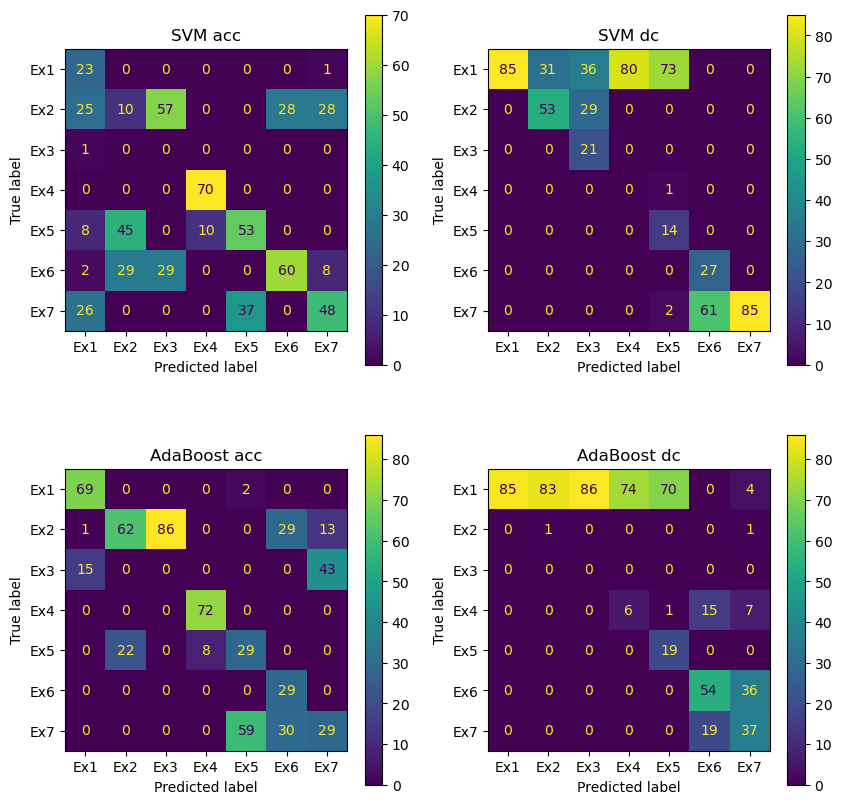

In [39]:
#Predictions are in string format. we cast them to float64
svm_pred_acc = svm_pred_acc.astype(np.float64)
svm_pred_dc = svm_pred_dc.astype(np.float64)
ada_pred_acc = ada_pred_acc.astype(np.float64)
ada_pred_dc =  ada_pred_dc.astype(np.float64)

#the same applies for y
y = test_set['exercise_id'].to_numpy().astype(np.float64)

print("SVM acc results:")
cm1 = f1_and_cf(svm_pred_acc, y)

print("SVM dc results:")
cm2 = f1_and_cf(svm_pred_dc, y)

print("AdaBoost acc results:")
cm3 = f1_and_cf(ada_pred_acc, y)

print("AdaBoost dc results:")
cm4 = f1_and_cf(ada_pred_dc, y)


fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

cm1.plot(ax=axs[0])
axs[0].set_title('SVM acc')

cm2.plot(ax=axs[1])
axs[1].set_title('SVM dc')

cm3.plot(ax=axs[2])
axs[2].set_title('AdaBoost acc')

cm4.plot(ax=axs[3])
axs[3].set_title('AdaBoost dc')

# Show the plot
plt.show()

### Combination of classifiers

In [40]:
# Combinations of classifiers
posterior_svm     = np.array((svm_prob_acc, svm_prob_dc))
posterior_ada     = np.array((ada_prob_acc, ada_prob_dc))
posterior_svm_ada = np.array((svm_prob_acc, ada_prob_dc))
posterior_ada_svm = np.array((ada_prob_acc, svm_prob_dc))


### Confusion matrix and F1 score for svm acc and svm dc

Max F1:  0.39277061300064114
Min F1:  0.620497137088778
Prod F1:  0.5355617904235807
Sum F1:  0.41126103162572936


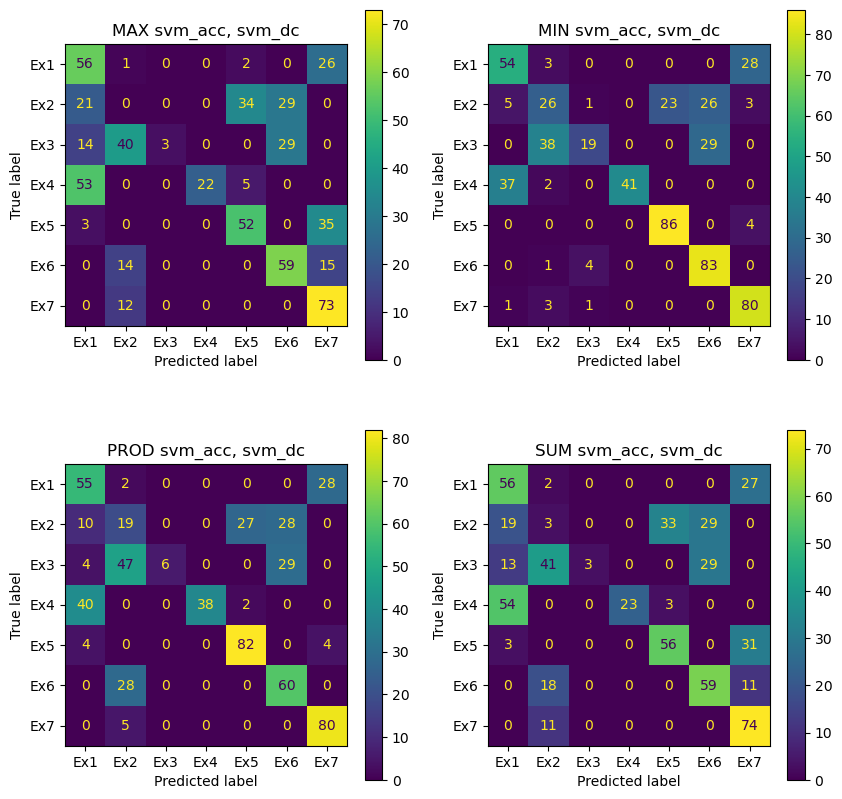

In [41]:
cm1 = f1_and_cf_max(posterior_svm, y)
cm2 = f1_and_cf_min(posterior_svm, y)
cm3 = f1_and_cf_prod(posterior_svm, y)
cm4 = f1_and_cf_sum(posterior_svm, y)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

cm1.plot(ax=axs[0])
axs[0].set_title('MAX svm_acc, svm_dc')

cm2.plot(ax=axs[1])
axs[1].set_title('MIN svm_acc, svm_dc')

cm3.plot(ax=axs[2])
axs[2].set_title('PROD svm_acc, svm_dc')

cm4.plot(ax=axs[3])
axs[3].set_title('SUM svm_acc, svm_dc')

plt.show()

### Confusion matrix and F1 score for ada acc and ada dc

Max F1:  0.4132756465777375
Min F1:  0.4695468252337813
Prod F1:  0.49890304772273864
Sum F1:  0.45024148358303284


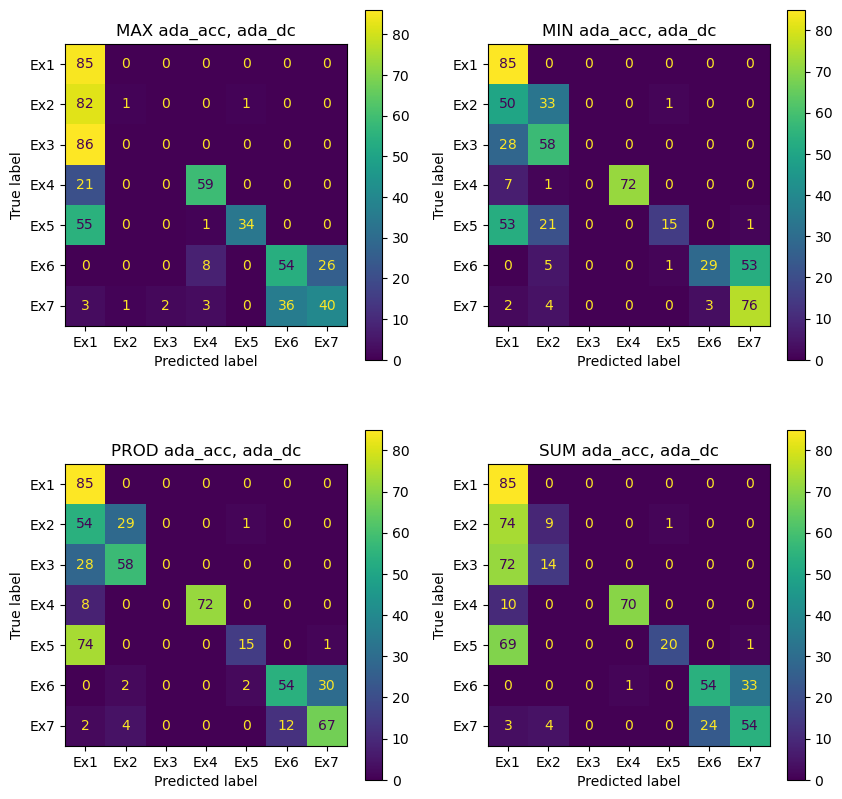

In [42]:
cm1 = f1_and_cf_max(posterior_ada, y)
cm2 = f1_and_cf_min(posterior_ada, y)
cm3 = f1_and_cf_prod(posterior_ada, y)
cm4 = f1_and_cf_sum(posterior_ada, y)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

cm1.plot(ax=axs[0])
axs[0].set_title('MAX ada_acc, ada_dc')

cm2.plot(ax=axs[1])
axs[1].set_title('MIN ada_acc, ada_dc')

cm3.plot(ax=axs[2])
axs[2].set_title('PROD ada_acc, ada_dc')

cm4.plot(ax=axs[3])
axs[3].set_title('SUM ada_acc, ada_dc')

plt.show()

### Confusion matrix and F1 score for svm acc and ada dc

Max F1:  0.44204538219583295
Min F1:  0.5918310583869358
Prod F1:  0.581917188965336
Sum F1:  0.48159441633509686


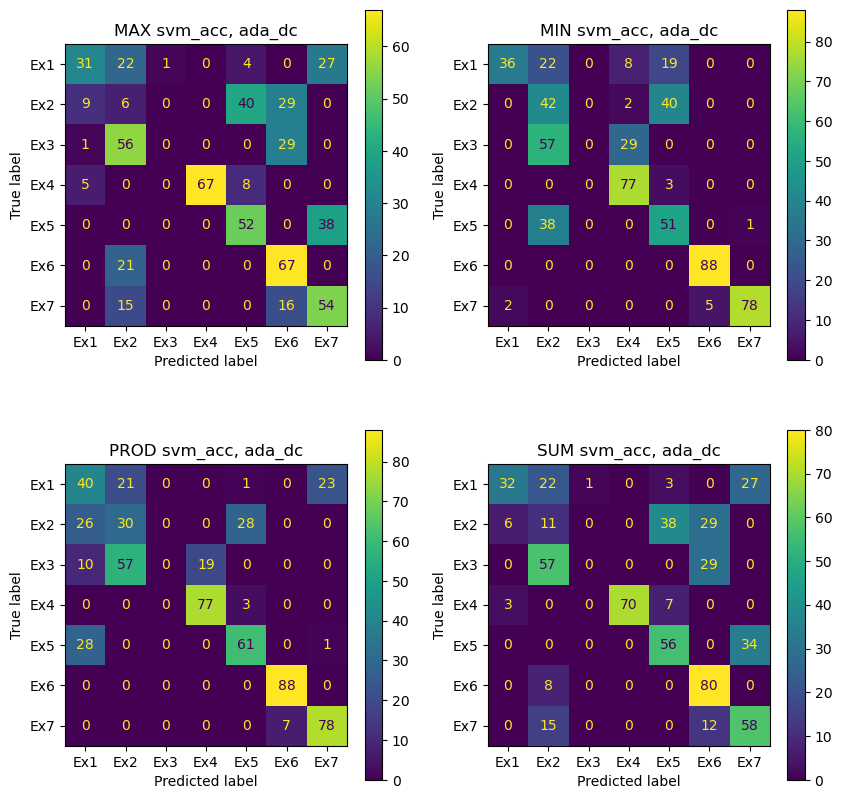

In [43]:
cm1 = f1_and_cf_max(posterior_svm_ada, y)
cm2 = f1_and_cf_min(posterior_svm_ada, y)
cm3 = f1_and_cf_prod(posterior_svm_ada, y)
cm4 = f1_and_cf_sum(posterior_svm_ada, y)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

cm1.plot(ax=axs[0])
axs[0].set_title('MAX svm_acc, ada_dc')

cm2.plot(ax=axs[1])
axs[1].set_title('MIN svm_acc, ada_dc')

cm3.plot(ax=axs[2])
axs[2].set_title('PROD svm_acc, ada_dc')

cm4.plot(ax=axs[3])
axs[3].set_title('SUM svm_acc, ada_dc')

plt.show()

### Confusion matrix and F1 score for ada acc and svm dc

Max F1:  0.5640588775575164
Min F1:  0.6568048196717878
Prod F1:  0.6072307883718794
Sum F1:  0.5683466902875789


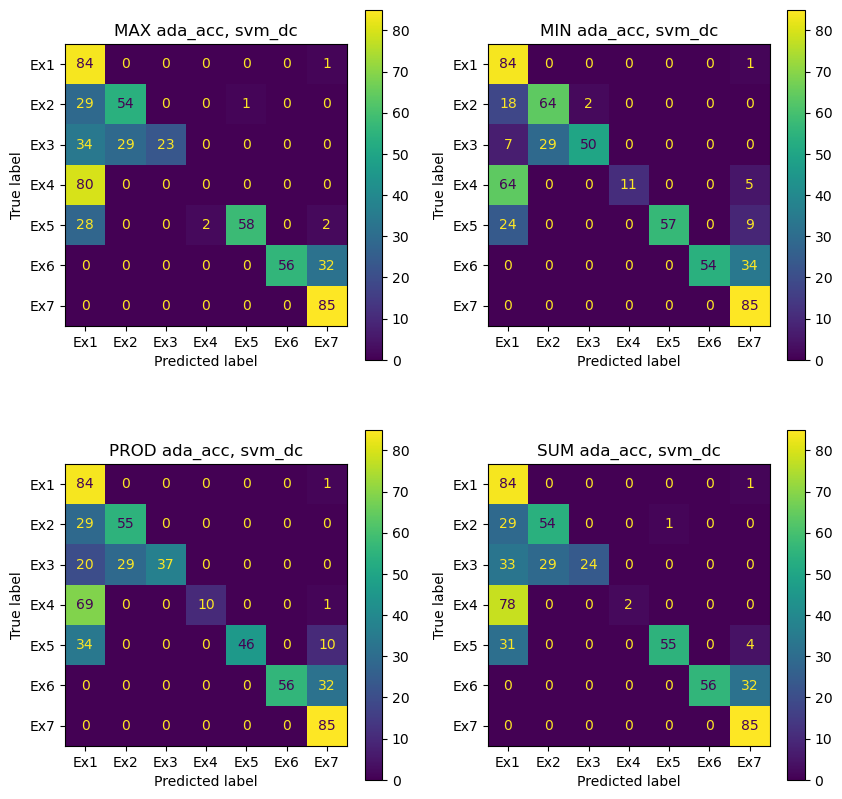

In [44]:
cm1 = f1_and_cf_max(posterior_ada_svm, y)
cm2 = f1_and_cf_min(posterior_ada_svm, y)
cm3 = f1_and_cf_prod(posterior_ada_svm, y)
cm4 = f1_and_cf_sum(posterior_ada_svm, y)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

cm1.plot(ax=axs[0])
axs[0].set_title('MAX ada_acc, svm_dc')

cm2.plot(ax=axs[1])
axs[1].set_title('MIN ada_acc, svm_dc')

cm3.plot(ax=axs[2])
axs[2].set_title('PROD ada_acc, svm_dc')

cm4.plot(ax=axs[3])
axs[3].set_title('SUM ada_acc, svm_dc')

plt.show()

Result analysis

# TODO

# 5. Bonus task: Multimodal biometric identification of persons (optional)

<a id='task5'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 5.</b>

Can you build a classifier that recognizes the person who is performing the exercise? Use same 10 person dataset and split it so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier. Use same 5 second windowing with 3 seconds overlap to prepare the examples. Note that, now the person identity is the class label instead of exercise type. Max. 10 points are given but you can earn points from partial solution, as well.
<br> 
<br> 
<p> <b>5.1</b> Build a classifier to identify persons based on the features and one of the models given in task 4 (max. 5 points).</p>
<br> 
<p> <b>5.2</b> Can you build your own solution (using new features, new classification model or different fusion approaches) to beat the approach in Task 5.1 ? (max. 5 points) </p>
<br>  
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

In [45]:
# Imports for 5
from scipy import signal
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [46]:
"""
# 5.1

# --------------- Functions -------------------- #

def windowing(df):
    ''' 
    5 second windowing with 3 seconds overlap to prepare the examples
    '''
    records_windowed = []

    time_window = 5000.
    time_offset = 2000.

    for row_idx, row_data in df.iterrows():
        df_tmp = row_data["df"]
        time_start = np.min(df_tmp["time"].to_numpy())
        time_end = np.max(df_tmp["time"].to_numpy())

        for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
            t1 = t0 + time_window
            # Handle boundary conditions - skip the measurements from the end shorter than window size
            if t1 > time_end:
                continue

            tmp_data = deepcopy(row_data)
            tmp_data["window_idx"] = window_idx
            tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                    (df_tmp["time"] < t1)].copy()

            records_windowed.append(tmp_data)

    df_records_windowed = pd.DataFrame.from_records(records_windowed)
    return df_records_windowed


def pairing_5(df):
    """
    Merges 2 dataframes to remove the unpaired windows.
    """
    df_acc = df[df['sensor_code'] == 'act']
    df_dc = df[df['sensor_code'] == 'dc']
    
    new_df = pd.merge(df_acc, df_dc,  how='inner', left_on=['subject_id','trial', 'window_idx', 'exercise_id'],
                      right_on = ['subject_id','trial', 'window_idx', 'exercise_id'])

    return new_df


# --------------- Main code -------------------- #
        
# Split data to training and test set.
# 25% of each long exercise sequence is used for training 
# and rest 75% of each sequence is used for testing the classifier.
train_set = pd.DataFrame.from_records(records).copy()
test_set = pd.DataFrame.from_records(records).copy()

for index, row in pd.DataFrame.from_records(records).iterrows(): 
    
    data_set = row['df']
    train=data_set.head(round(0.25*len(data_set)))
    test=data_set.drop(train.index)

        
    train_set.at[index, "df"] = train
    test_set.at[index, "df"] = test

wind_trainset = windowing(train_set)
wind_testset = windowing(test_set)

paired_trainset = pairing_5(wind_trainset)
paired_testset = pairing_5(wind_testset)

# Remove unnecessary columns
paired_trainset = paired_trainset.drop(['sensor_code_x','sensor_x', 'sensor_code_y', 'sensor_y'], axis=1)
paired_testset = paired_testset.drop(['sensor_code_x','sensor_x', 'sensor_code_y', 'sensor_y'], axis=1)
pross_trainset = paired_trainset.rename(columns={'df_x': 'df_acc', 'df_y': 'df_dc'})
pross_testset = paired_testset.rename(columns={'df_x': 'df_acc', 'df_y': 'df_dc'})

# Info
print("Training dataset")
print('Number of rows in training set: ', len(pross_trainset))
print('Number of Columns/dimentions in training set: ', len(pross_trainset.columns))
print('Column names of training set: ', pross_trainset.columns.values)
print('Shape of the training set: ', pross_trainset.shape)
print('\n')
print("Testing dataset")
print('Number of rows in test set: ', len(pross_testset))
print('Number of Columns/dimentions in test set: ', len(pross_testset.columns))
print('Column names of test set: ', pross_testset.columns.values)
print('Shape of test set: ', pross_testset.shape)
print('\n')

#------------ PCA ------------#

pca_train_df = pross_trainset.copy()
pca_test_df = pross_testset.copy()

# downsample and standardize the data
train_acc = downsample_acc(pca_train_df['df_acc'])
test_acc = downsample_acc(pca_test_df['df_acc'])
train_acc, test_acc = stand_shape_acc(train_acc,test_acc)

# PCA with dimension 10
dim = 10
pca = PCA(n_components=dim)

train_acc, test_acc = pca_transform_acc_dim(train_acc, test_acc, dim)

# For each window calculate mean and standard deviation of each three acc channels 
# as statistical features, resulting 6-dimensional vector. 
train_meanstd = acc_mean_std_vector(train_acc)
test_meanstd = acc_mean_std_vector(test_acc)

# Combine to 36-dimensional final feature vector.
pca_train_df['df_acc'] = [combine3(x) for i,x in enumerate(zip(train_acc, train_meanstd))] # Combine function is called and train_mean_std_vector is placed at the end.
pca_test_df['df_acc'] = [combine3(x) for i,x in enumerate(zip(test_acc, test_meanstd))]

# Check data
print("train df_acc shape: ", pca_train_df['df_acc'][0].shape)

# PCA with dimensions 10
dim = 10
pca = PCA(n_components=dim)

# Drop time column and standardize the data
train_dc = np.array([x.drop(['time'], axis = 1).to_numpy() for x in pca_train_df['df_dc']])
test_dc = np.array([x.drop(['time'], axis = 1).to_numpy() for x in pca_test_df['df_dc']])
train_dc, test_dc = standardize_dc(train_dc, test_dc)
pca_train, pca_test = pca_transform_dc(train_dc, test_dc,dim)

# Concatenate the image sequence forming 50-dimensional feature vector from each windowed example
pca_train_df['df_dc'] = [x.flatten() for i, x in enumerate(pca_train)]
pca_test_df['df_dc'] = [x.flatten() for i, x in enumerate(pca_test)]

#TODO error
# Check data
print("train df_dc data shape: ", pca_train_df['df_dc'][0].shape)
combined_train_acc = feature_combination_acc(train_acc, train_meanstd)
combined_test_acc = feature_combination_acc(test_acc, test_meanstd)
combined_train_dc = feature_combination_dc(train_dc)
combined_test_dc = feature_combination_dc(test_dc)

# Normalizing
combined_train_acc, combined_test_acc = min_max_standardize(combined_train_acc,combined_test_acc)
combined_train_dc, combined_test_dc = min_max_standardize(combined_train_dc,combined_test_dc)

# Check shape
print('Shape of train acc: ',combined_train_acc.shape)
print('Shape of test acc: ',combined_test_acc.shape)
print('Shape of train dc: ',combined_train_dc.shape)
print('Shape of test dc: ',combined_test_dc.shape)

# Param range for classifiers defined
svm_parameters = {'C':[0.1,1.0,10.0,100.0], 'gamma': [0.1,0.25,0.5,0.75,1.0,2.0]}
adaBoost_parameters = {'learning_rate': [0.1,0.25,0.5,0.75,1.0],'n_estimators':[50,100,500,1000] }

# models
svm_model = svm.SVC(kernel='rbf')
ada_model = AdaBoostClassifier(random_state=0)

# Used to find best parameters for best performance
svm_clf = GridSearchCV(svm_model, svm_parameters, cv=10)
svm_clf.fit(combined_train_acc, train_set['subject_id'])
svm_best_params_acc = svm_clf.best_params_
print('Best hyperparameters for SVM training acc data : ',svm_best_params_acc)
svm_clf.fit(combined_train_dc, train_set['subject_id'])
svm_best_params_dc = svm_clf.best_params_
print('Best hyperparameters for SVM training dc data: ',svm_best_params_dc)

# Used to find best parameters for best performance
adaBoost = GridSearchCV(ada_model, adaBoost_parameters, cv=10)
adaBoost.fit(combined_train_acc, train_set['subject_id'])
ada_best_params_acc = adaBoost.best_params_
print('Best hyperparameters for AdaBoost training acc :', ada_best_params_acc)
adaBoost.fit(combined_train_dc, train_set['subject_id'])
ada_best_params_dc = adaBoost.best_params_
print('Best hyperparameters for AdaBoost training acc :', ada_best_params_dc)

# Training SVM
svm_acc = svm.SVC(kernel='rbf', C=svm_best_params_acc['C'], gamma=svm_best_params_acc['gamma'], probability=True).fit(combined_train_acc, train_set['subject_id'])
svm_dc = svm.SVC(kernel='rbf', C=svm_best_params_dc['C'], gamma=svm_best_params_dc['gamma'], probability=True).fit(combined_train_dc, train_set['subject_id'])
# Testing SVM
svm_pred_acc = svm_acc.predict(combined_test_acc)
svm_prob_acc = svm_acc.predict_proba(combined_test_acc)
svm_pred_dc = svm_dc.predict(combined_test_dc)
svm_prob_dc = svm_dc.predict_proba(combined_test_dc)
print('SVM probs (acc, dc): \n',svm_prob_acc, '\n', svm_prob_dc)

# Training AdaBoost
ada_acc = AdaBoostClassifier(random_state=0, learning_rate=ada_best_params_acc['learning_rate'], n_estimators=ada_best_params_acc['n_estimators'] ).fit(combined_train_acc, train_set['subject_id'])
ada_dc = AdaBoostClassifier(random_state=0, learning_rate=ada_best_params_dc['learning_rate'], n_estimators=ada_best_params_dc['n_estimators'] ).fit(combined_train_dc, train_set['subject_id'])
# Testing AdaBoost
ada_pred_acc = ada_acc.predict(combined_test_acc)
ada_prob_acc = ada_acc.predict_proba(combined_test_acc)
ada_pred_dc = ada_dc.predict(combined_test_dc)
ada_prob_dc = ada_dc.predict_proba(combined_test_dc)
print('SVM probs (acc, dc): \n',ada_prob_acc, '\n', ada_prob_dc)

print("SVM acc results: \n")
f1_and_cf(svm_pred_acc, combined_test_acc)
print("SVM dc results: \n")
f1_and_cf(svm_pred_dc, combined_test_dc)
print("AdaBoost acc results: \n")
f1_and_cf(ada_pred_acc, combined_test_acc)
print("AdaBoost dc results: \n")
f1_and_cf(ada_pred_dc, combined_test_dc)

# Combinations of classifiers
svm_acc_svm_dc = np.array((svm_prob_acc, svm_prob_dc))
ada_acc_ada_dc = np.array((ada_prob_acc, ada_prob_dc))
svm_acc_ada_dc = np.array((svm_prob_acc, ada_prob_dc))
ada_acc_svm_dc = np.array((ada_prob_acc, svm_prob_dc))

# Confusion matrix and F1 score for svm acc and svm dc
print('Confusion matrix and F1 score for svm acc and svm dc')
f1_and_cf_max(svm_acc_svm_dc)
f1_and_cf_min(svm_acc_svm_dc)
f1_and_cf_prod(svm_acc_svm_dc)
f1_and_cf_sum(svm_acc_svm_dc)

# Confusion matrix and F1 score for ada acc and ada dc
print('Confusion matrix and F1 score for ada acc and ada dc')
f1_and_cf_max(ada_acc_ada_dc)
f1_and_cf_min(ada_acc_ada_dc)
f1_and_cf_prod(ada_acc_ada_dc)
f1_and_cf_sum(ada_acc_ada_dc)

# Confusion matrix and F1 score for svm acc and ada dc
print('Confusion matrix and F1 score for svm acc and ada dc')
f1_and_cf_max(svm_acc_ada_dc)
f1_and_cf_min(svm_acc_ada_dc)
f1_and_cf_prod(svm_acc_ada_dc)
f1_and_cf_sum(svm_acc_ada_dc)

# Confusion matrix and F1 score for ada acc and svm dc
print('Confusion matrix and F1 score for ada acc and svm dc')
f1_and_cf_max(ada_acc_svm_dc)
f1_and_cf_min(ada_acc_svm_dc)
f1_and_cf_prod(ada_acc_svm_dc)
f1_and_cf_sum(ada_acc_svm_dc)
"""

IndentationError: unexpected indent (3698372111.py, line 39)

In [ ]:
# 5.2

# TODO
# neural network maybe?